<a href="https://colab.research.google.com/github/EnglishDevil/Mapthing/blob/master/Map_of_Obesity_Yorkshire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Map showing prescriptions for obesity in Yorkshire and the humber

Learn how to make maps of the UK with numbers superimposed over it.
Graphs, bar charts etc

Mental health data 

# Install the required libraries

In [1]:
!apt-get install  libgeos-3.5.0
!apt-get install  libgeos-dev
!pip install  https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (177 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 130911 files and directories currently installed.)
Prep

In [2]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.1.3
    Uninstalling pyproj-2.1.3:
      Successfully uninstalled pyproj-2.1.3


# Begin producing the region map

Here I just did Yorkshire but perhaps we can change it to the whole uk

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

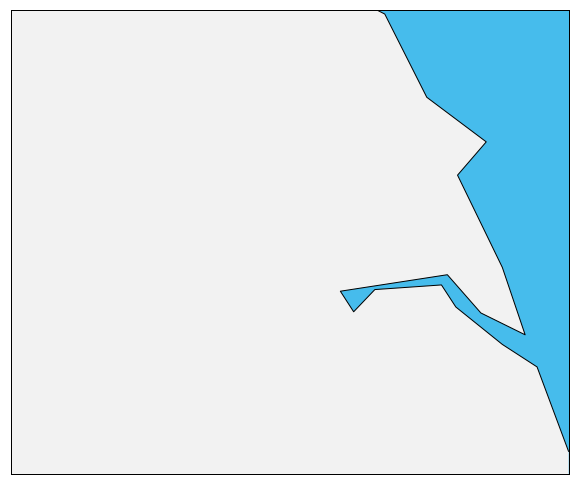

In [7]:
fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='l', # c, l, i, h, f or None # These are the resolutions, crude low intermediate high and full. Use low or crude to begin then full at the end.
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-2.37, llcrnrlat= 53.17, urcrnrlon=0.32, urcrnrlat=54.49)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

#Next; Need to uploaded shape files to github and access them using the script below

#boundaries
#m.readshapefile('data/uk_postcode_bounds/Areas', 'areas')

# Changing the dataset so that it will show up on a map

1.   Need to make the location data so that it has a longditude and latitude
> a. Success! Was able to get the shape files and other data from geoportal.statistics.gov.uk

> b. Was able to get them for CCG and region


2.   Need to remove superfluous collumns
3.   Do basic exploratory analysis


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="white", color_codes=True)

%matplotlib inline

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/EnglishDevil/Mapthing/master/Obes-phys-acti-diet-eng-tab-2019%20table%204.2.csv")
df.head()

#Need to remove the unamed collumn.
#Need to see if it can plot the data sensibly, like rearrange the data so that all of the N are collated etc.
#Need to use the long and lat data from geoportal to give each of the CCG's a long and lat so the shape file can be used.

,Region,Unnamed: 1,Commissioning_Region,Area,CCG,Prescription items,per_1000_pop
0,E92000001,NaN,NaN,NaN,ENGLAND,"389,464",7.0
1,E40000001,NaN,Y54,N,North of England,"141,897",9.0
2,E39000029,NaN,Q72,N,NHS England North (Yorkshire and Humber),"47,999",9.0
3,E38000001,NaN,02N,N,"NHS Airedale, Wharfedale and Craven",827,5.0
4,E38000006,NaN,02P,N,NHS Barnsley,"3,996",16.0


# Stuff to do with saving the libaries in gdrive

In [0]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.append(0,nb_path)



Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


FileExistsError: ignored

In [0]:
!apt-get install --target=$nb_path libgeos-3.5.0

E: Command line option --target=/content/notebooks is not understood in combination with the other options
